In [1]:
import config
import os, numpy as np, pandas, sklearn, scipy.signal as signal
import mido
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## NN libs
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
import keras
from keras import backend as K, metrics
from keras.utils import to_categorical, plot_model
from keras.layers import Input, Dense, Activation, Conv1D, Conv2D, Dropout, Flatten, Lambda
from keras.layers import Conv2DTranspose, Reshape, MaxPooling2D, UpSampling2D, UpSampling1D, MaxPooling1D
from keras.layers import LocallyConnected1D, LocallyConnected2D
from keras.layers import Input, LSTM, RepeatVector
from keras.models import Model
from keras.callbacks import TensorBoard

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
# local libs
import config, models, functions
from data import data, midi, midi_generators as g
from utils import io, models_io, utils, plot

 Context :: namedtuple(
[ max_t = float
, dt = float
, n_instances = int
, note_length = int
, bpm = float
, tempo = float
, ticks_per_beat = int
]



In [4]:
context = data.init()
n = 2
multiTrack = True
context, x_train, labels = data.import_data(data.init(), n, multiTrack=multiTrack)

Setting up params

max min f 25.0 0.3333333333333333
 >> Context(max_t=3.0, dt=0.02, n_instances=150, note_length=0.03, bpm=120.0, tempo=500000, ticks_per_beat=480)
Setting up params

max min f 25.0 0.3333333333333333
 >> Context(max_t=3.0, dt=0.02, n_instances=150, note_length=0.03, bpm=120.0, tempo=500000, ticks_per_beat=480)
Importing midi-data

 [INFO] : 
 |  reading file: ../datasets/examples/01 16th Snare.mid
 [INFO] : 
 |  reading file: ../datasets/examples/01 8th Cym.mid

Encoding midi-data
 [<midi file '../datasets/examples/01 16th Snare.mid' type 0, 1 tracks, 182 messages>, <midi file '../datasets/examples/01 8th Cym.mid' type 0, 1 tracks, 68 messages>]
> -> multi-track = True
<meta message track_name name='01 16th Snare\x00' time=0>
<meta message time_signature numerator=4 denominator=4 clocks_per_click=36 notated_32nd_notes_per_beat=8 time=0>
<meta message time_signature numerator=4 denominator=4 clocks_per_click=36 notated_32nd_notes_per_beat=8 time=0>
note_on channel=0 no

In [5]:
n = 10
min_f = 3
max_f = 15
# x_train = g.gen_data(context, n, max_f=max_f, min_f=min_f)
# x_train = g.gen_data_complex(context, n, max_f=max_f, min_f=min_f, multiTrack=multiTrack)
x_train = g.gen_data_complex(context, n, max_f=max_f, min_f=min_f, 
    n_polyrythms=1,
    n_channels=midi.N_NOTES,
    multiTrack=multiTrack)

note_on channel=0 note=62 velocity=127 time=0.015625
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.04583333333333333
note_on channel=0 note=62 velocity=127 time=0.00625
note_off channel=0 note=60 velocity=127 time=0.013541666666666667
note_on channel=0 note=61 velocity=127 time=0.0020833333333333333
note_off channel=0 note=62 velocity=127 time=0.005208333333333333
note_off channel=0 note=61 velocity=127 time=0.014583333333333334
note_on channel=0 note=62 velocity=127 time=0.0375
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.011458333333333333
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.019791666666666666
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.011458333333333333
note_off channel=0 note=61 velocity=127 time=0.0197916666

note_on channel=0 note=60 velocity=127 time=0.020833333333333332
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.015625
note_on channel=0 note=61 velocity=127 time=0.005208333333333333
note_off channel=0 note=62 velocity=127 time=0.014583333333333334
note_off channel=0 note=61 velocity=127 time=0.005208333333333333
note_on channel=0 note=60 velocity=127 time=0.0125
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.029166666666666667
note_on channel=0 note=62 velocity=127 time=0.008333333333333333
note_off channel=0 note=61 velocity=127 time=0.0125
note_on channel=0 note=60 velocity=127 time=0.003125
note_off channel=0 note=62 velocity=127 time=0.004166666666666667
note_off channel=0 note=60 velocity=127 time=0.015625
note_on channel=0 note=61 velocity=127 time=0.0375
note_on channel=0 note=60 velocity=127 time=0.014583333333333334
note_off channel=0 note=61 velo

note_on channel=0 note=62 velocity=127 time=0.005208333333333333
note_on channel=0 note=61 velocity=127 time=0.003125
note_off channel=0 note=62 velocity=127 time=0.016666666666666666
note_off channel=0 note=61 velocity=127 time=0.003125
note_on channel=0 note=60 velocity=127 time=0.0375
note_on channel=0 note=62 velocity=127 time=0.008333333333333333
note_off channel=0 note=60 velocity=127 time=0.011458333333333333
note_on channel=0 note=61 velocity=127 time=0.0020833333333333333
note_off channel=0 note=62 velocity=127 time=0.00625
note_off channel=0 note=61 velocity=127 time=0.013541666666666667
note_on channel=0 note=62 velocity=127 time=0.035416666666666666
note_on channel=0 note=60 velocity=127 time=0.009375
note_off channel=0 note=62 velocity=127 time=0.010416666666666666
note_on channel=0 note=61 velocity=127 time=0.004166666666666667
note_off channel=0 note=60 velocity=127 time=0.005208333333333333
note_off channel=0 note=61 velocity=127 time=0.014583333333333334
note_on channe

In [6]:
n = 3
total = 1000 * 10
x_test = x_train[n:]
x_train = np.concatenate([x_train[:n] for _ in range(int(total/n))])

In [7]:
x_train.shape

(9999, 150, 3)

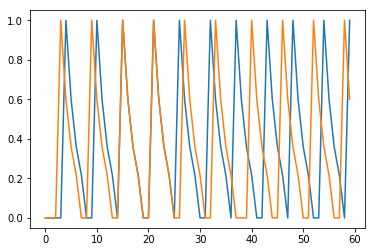

In [8]:
plt.plot(x_train[0,:60,0])
plt.plot(x_train[1,:60,0])

m (30, 3)


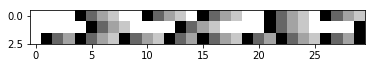

In [9]:
plot.multi(x_train[0, :30])

m (30, 3)


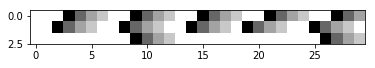

In [10]:
plot.multi(x_train[1, :30])

In [11]:
data = x_train[0,:20]
data.shape

(20, 3)

In [12]:
n_samples = x_train[0]
input_shape = x_train.shape[1:] # shape of a single sample
output_shape = x_train.shape[1:] # shape of a single sample
timesteps, notes = x_train.shape[1:3]
# output_length = y_train.shape[1:][0]
input_shape

(150, 3)

In [13]:
output_shape

(150, 3)

In [14]:
input_shape
# input_shape = (150,)
input_shape

(150, 3)

In [15]:
batch_size = 32
original_dim = 150
latent_dim = 50
intermediate_dim = 150
epsilon_std = 1.0

In [16]:
# TODO Batch Normalization

In [17]:
def sampling(args, latent_dim, epsilon_std):
    z_mean, z_log_var = args
    # epsilon = K.random_normal(shape=(batch_size, latent_dim), mean=0., stddev=epsilon_std)
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0., stddev=epsilon_std)
    return z_mean + K.exp(z_log_var / 2) * epsilon

In [32]:
k_reg = keras.regularizers.l2(1e-5)
# b_reg = keras.regularizers.l1(0.01)
a_reg = keras.regularizers.l1(1e-5)

encoder_input = Input(shape=input_shape, name='encoder_input-')
h = encoder_input
    # image_data_format = 'channels_last'   -   e.g. (28,28,3)
    # naive assumption:
    #   for drumkits no correlation between note_indices and occurrence at an timestep is assumed
    #   (that is, p(E|C) is not significantly different from p(D|C))
    #   - note that this _is_ the case for e.g. HH vs. OH
    #     these often occur in the same register (between different drumkits)
    #   - even with melodic/harmonic data, this assumption could help by reducing
    #    (1) unwanted repetition (stuttering) of notes
    #    (2) unwanted dissonance (caused by playing notes with an interval of a half step)
    
timesteps = input_shape[-2]
notes = input_shape[-1]
    
    # Convolve & Pool
h = Conv1D(32, kernel_size=2, strides=2, activation='relu', padding='same')(h)
# h = Conv1D(32, kernel_size=2, strides=1, activation='relu', padding='same')(h)
h = Conv1D(64, kernel_size=2, strides=1, activation='relu', padding='same')(h)

    # Dense layers
h = Flatten()(h)
h = Dense(intermediate_dim, activation='relu')(h)
#     h = Dense(intermediate_dim, activation='relu')(h)
#     h = Dense(intermediate_dim, activation='relu')(h)    
#     h = Dropout(0.1)(h) # uncomment when using larger batches
#     h = Dense(intermediate_dim, activation='relu')(h)
    # h = Dense(intermediate_dim, activation='relu', kernel_regularizer=k_reg, activity_regularizer=a_reg)(h)

    # Z Mean, Variance
z_mean = Dense(latent_dim, name='z_mean')(h) # , activation='relu'
z_log_var = Dense(latent_dim, name='z_log_var')(h) # , activation='relu'
    
encoder_output = [z_mean, z_log_var]

# sample z from a distribution defined by [input_mean, input_log_var]
# input :: [z_mean, z_log_var]
# z_input = [Input(shape=(latent_dim,)), Input(shape=(latent_dim,))]
z_input = encoder_output
sampling_ = lambda args: sampling(args, latent_dim, epsilon_std)
z_output = Lambda(sampling_, name='z_sampler-')(z_input)
# z_output = Lambda(sampling_, output_shape=(latent_dim,), name='z_sampler-')(z_input)

# decoder_input = Input(shape=(latent_dim,), name='decoder_input-')
decoder_input = z_output
h = decoder_input
    # :output_shape = (timesteps, channels, channels) || (batches, filters, timesteps, channels)
    # keras offers just Conv2DTranspose and not Conv1DTranspose
    # - use 2D images during upsampling :: (timesteps, notes, channels) => (timesteps, notes, filters)
    # - use 1D images to optimize reconstruction :: (timesteps, filters) => (timesteps, notes)
    
    # at the start of upsampling, the image-structure does not yet have to correspond to the goal structure 
    # ?TODO use y*y*y starting dims, may conv, and only then correct the structure (?)
    
timesteps = input_shape[-2] # cols
notes = input_shape[-1] # rows
channels = 1 # rgb

    # image_data_format = 'channels_last'
    # goal shape: (timesteps, notes, channels)
    # start with the 'reverse': lots of small imgs => few large img
m = 4 # multiplier for dims
output_shape = (channels, notes * m, timesteps)
p = 'valid'

    # upsampling
h = Dense(np.prod(output_shape[-3:]), activation='relu')(h)
h = Reshape(output_shape[-3:])(h)
    
    # Convolve & Pool
    # Note that the kernel windows do not yet correspond to 'temporal' features, but rather to just spatial features
k = (3,2) # (2,1) :: (timesteps, notes)
s = (1,3)
    # TODO
s1 = (3,1)
s2 = (1,3)
s3 = 2
timesteps_ = int(timesteps / 2)
h = Conv2DTranspose(timesteps_, kernel_size=k, strides=3, activation='relu', padding=p)(h)
h = Conv2DTranspose(32, kernel_size=k, strides=3, activation='relu', padding=p)(h)
#     h = Conv2DTranspose(32, kernel_size=k, strides=3, activation='relu', padding=p)(h)
h = Conv2DTranspose(16, kernel_size=k, strides=(3,1), activation='relu', padding=p)(h)
h = MaxPooling2D(pool_size=2, strides=2, padding='same')(h)

#     h = Conv2DTranspose(32, kernel_size=k, strides=3, activation='relu', padding=p)(h)
h = Conv2DTranspose(16, kernel_size=k, strides=3, activation='relu', padding=p)(h)
    # 'end' of upsampling
h = Conv2D(1, kernel_size=(1,2), strides=1, activation='relu', padding=p)(h)
dims = keras.backend.int_shape(h)[1:]
print('dims', dims)
h = Reshape(dims[0:2])(h)
#     h = Conv1D(16, kernel_size=2, strides=1, activation='relu', padding=p)(h)
h = Conv1D(notes * m, kernel_size=2, strides=2, activation='relu', padding=p)(h)

    
    # Mean (output)
#     h = Conv2D(1, kernel_size=1, strides=s, activation='sigmoid', padding='same')(h)
output_shape = (timesteps, notes)
h = Flatten()(h)
h = Dense(np.prod(output_shape), activation='sigmoid')(h)
output_shape = (timesteps, notes)
h = Reshape(output_shape)(h)
decoder_output = h

dims (42, 164, 1)


In [33]:
output_shape

(150, 3)

In [39]:
filters = 32
num_conv = 16
decoder_hid = Dense(intermediate_dim, activation='relu')
decoder_upsample = Dense(filters * 14 * 14, activation='relu')


if K.image_data_format() == 'channels_first':
    output_shape = (batch_size, filters, 14, 14)
else:
    output_shape = (batch_size, 14, 14, filters)
    
decoder_reshape = Reshape(output_shape[1:])
decoder_deconv_1 = Conv2DTranspose(filters,
                                   kernel_size=num_conv,
                                   padding='same',
                                   strides=1,
                                   activation='relu')
decoder_deconv_2 = Flatten()

if K.image_data_format() == 'channels_first':
    output_shape = (batch_size, filters, 29, 29)
else:
    output_shape = (batch_size, 29, 29, filters)
decoder_deconv_3_upsamp = Dense(np.prod(x_train.shape[1:]))
decoder_mean_squash = Reshape(x_train.shape[1:])

hid_decoded = decoder_hid(z_output)
up_decoded = decoder_upsample(hid_decoded)
reshape_decoded = decoder_reshape(up_decoded)
deconv_1_decoded = decoder_deconv_1(reshape_decoded)
deconv_2_decoded = decoder_deconv_2(deconv_1_decoded)
x_decoded_relu = decoder_deconv_3_upsamp(deconv_2_decoded)
x_decoded_mean_squash = decoder_mean_squash(x_decoded_relu)
decoder_output = x_decoded_mean_squash

In [40]:
# encoder_model, z_mean, z_log_var, encoder_input = encoder(latent_dim, input_shape)
# z_model = z_(latent_dim, epsilon_std)
# decoder_model, decoder_output = decoder(latent_dim, output_shape)


# encoder_model.summary()
# z_model.summary()
# decoder_model.summary()

In [41]:
output_shape

(32, 29, 29, 32)

In [42]:
# vae_input = Input(shape=input_shape)
# vae_input = encoder_input # WHY ?
# vae_output = decoder_model(z_model(encoder_model(vae_input)))
vae_input = encoder_input
vae_output = decoder_output

# vae_output = decoder_model(z)
vae = Model(vae_input, vae_output)
vae.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input- (InputLayer)     (None, 150, 3)       0                                            
__________________________________________________________________________________________________
conv1d_4 (Conv1D)               (None, 75, 32)       224         encoder_input-[0][0]             
__________________________________________________________________________________________________
conv1d_5 (Conv1D)               (None, 75, 64)       4160        conv1d_4[0][0]                   
__________________________________________________________________________________________________
flatten_3 (Flatten)             (None, 4800)         0           conv1d_5[0][0]                   
__________________________________________________________________________________________________
dense_4 (D

In [45]:
def vae_loss(y_true, y_pred, z_mean, z_log_var, timesteps=150, notes=3, beta=1.):
#     xent_loss = 10 * K.binary_crossentropy(K.flatten(y_true), K.flatten(y_pred))
    xent_loss = timesteps * notes * K.binary_crossentropy(K.flatten(y_true), K.flatten(y_pred))
#     xent_loss = timesteps * notes * K.binary_crossentropy(y_true, y_pred)
    kl_loss = - 0.5 * K.mean(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
#     kl_loss = K.mean(K.square(z_mean))
#     kl_loss = K.mean(K.square(z_mean) - K.exp(z_log_var), axis=-1)
    # kl_loss = - 0.5 * K.sum(1 + K.flatten(z_log_var) - K.square(K.flatten(z_mean)) - K.exp(K.flatten(z_log_var)), axis=-1)
    return xent_loss + beta * kl_loss

In [53]:
# Compute VAE loss
# no img_cols!
xent_loss = timesteps * keras.metrics.binary_crossentropy(
    K.flatten(vae_input),
    K.flatten(vae_output))
kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
vae_loss = K.mean(xent_loss + kl_loss)
vae.add_loss(vae_loss)                

vae.compile(optimizer='rmsprop')
# vae.summary()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Output "reshape_11" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "reshape_11" during training.
  # Remove the CWD from sys.path while we load stuff.


In [46]:
beta = 1.
metrics = ['acc','mse','mae','binary_crossentropy']
# loss = lambda y_true, y_pred: vae_loss(y_true, y_pred, z_mean, z_log_var, timesteps, notes)
# loss = lambda y_true, y_pred: vae_loss(vae_input, vae_output, z_mean, z_log_var, timesteps, notes)
loss = vae_loss(vae_input, vae_output, z_mean, z_log_var, timesteps, notes)

optimizer = 'rmsprop' # adam adadelta rmsprop nadam
# keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
# vae.compile(optimizer=optimizer, loss=loss, metrics=metrics)

vae.add_loss(loss)
vae.compile(optimizer='rmsprop')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Output "reshape_11" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "reshape_11" during training.
  if sys.path[0] == '':


In [47]:
# vae.add_loss(vae_loss)
# vae.compile(optimizer='rmsprop', metrics=['binary_accuracy','mae'])

In [48]:
# z_train = x_train
# x_train = x_train.reshape(x_train.shape[0],np.prod(x_train.shape[1:]))
# x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_train.shape

(9999, 150, 3)

In [54]:
epochs = 250
m = 100
vs = 1/6
shuffle = True
callbacks = []
callbacks = [TensorBoard(log_dir=config.tmp_log_dir)]
# model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=[TensorBoard(log_dir=config.tmp_log_dir)])
# history = vae.fit(x_train[:m], x_train[:m], epochs=epochs, batch_size=batch_size,
#           validation_split=vs, callbacks=callbacks, shuffle=shuffle)
history = vae.fit(x_train[:m], shuffle=False, epochs=epochs, batch_size=batch_size)

Epoch 1/250


InvalidArgumentError: Incompatible shapes: [14400] vs. [32]
	 [[Node: add_3 = Add[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"](mul_3, mul_5)]]

Caused by op 'add_3', defined at:
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 127, in start
    self.asyncio_loop.run_forever()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/asyncio/base_events.py", line 421, in run_forever
    self._run_once()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/asyncio/base_events.py", line 1431, in _run_once
    handle._run()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 117, in _handle_events
    handler_func(fileobj, events)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-46-b9857cadcd71>", line 5, in <module>
    loss = vae_loss(vae_input, vae_output, z_mean, z_log_var, timesteps, notes)
  File "<ipython-input-45-a8d1ab478110>", line 9, in vae_loss
    return xent_loss + beta * kl_loss
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/ops/math_ops.py", line 907, in binary_op_wrapper
    return func(x, y, name=name)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/ops/gen_math_ops.py", line 183, in add
    "Add", x=x, y=y, name=name)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3160, in create_op
    op_def=op_def)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1625, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): Incompatible shapes: [14400] vs. [32]
	 [[Node: add_3 = Add[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"](mul_3, mul_5)]]


In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

In [ ]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])

In [ ]:
# plot_model(vae, to_file='model.png')

In [ ]:
plt.plot(x_train[0,:100,:])

In [ ]:
result.shape

In [ ]:
n1 = 30
i = 0
plt.subplot(211)
plt.plot(np.arange(n1), results[i][:n1])
plt.plot([0.5] * n1) # midi.MIDI_NOISE_FLOOR
plt.ylim(ymin=0, ymax=1)
plt.subplot(212)

plt.plot(np.arange(n1), x_train[i, :n1])
plt.plot([0.5] * n1) # midi.MIDI_NOISE_FLOOR
plt.ylim(ymin=0, ymax=1)

In [ ]:
mid = midi.decode_track(context, result)
dn = config.dataset_dir
# io.export_midifile(mid, dn + 'song_seq-seq.mid')

In [ ]:
results = []
latent_samples = []
for seq in x_test[-2:]:
    encoded = encode_sequence(np.stack([seq]))
    latent_samples.append(encoded)
    result = decode_sequence(encoded, encoder_model, decoder_model)
    results.append(result)
results[0].shape

In [ ]:
len(encoded)

In [ ]:
encoded[0].shape

In [ ]:
plt.plot(encoded[0][0,:10])
plt.plot(encoded[1][0,:10])

In [ ]:
e = np.array(latent_samples)
e.shape

In [ ]:
# reduce dimensionality
# e = e.reshape(e.shape[0],2,e.shape[-1])
e.shape

In [ ]:
e1.mean(axis=0).shape

In [ ]:
# new = e.transpose().mean(axis=1).transpose()
e1 = e[:,0] # state h
e2 = e[:,1] # state c
new = [e1.mean(axis=0), e2.mean(axis=0)]
# new = [[e[:,i].mean(axis=0)] for i in [0,1]]
plt.plot(new[0][0][:10])
len(new)

In [ ]:
e1.mean(axis=0).shape

In [ ]:
l[0].shape

In [ ]:
l = latent_samples[0]
len(l) # latent_sample :: (x,1,64)

In [ ]:
# new_ = decode_sequence(latent_samples[0], encoder_model, decoder_model)
new_ = decode_sequence(new, encoder_model, decoder_model)

In [ ]:
new_.shape

In [ ]:
plt.plot(new_[:100])

In [ ]:
plt.plot(results[0][:100])

In [ ]:
# results[0]

In [ ]:
mid_new = midi.decode_track(context, results[0])
io.export_midifile(mid_new, config.export_dir + 'real_mid_new_lstm.mid')

In [ ]:
x_test.shape

In [ ]:
# x_test, y_test = gen_xy_sin_to_f(3, f=2)

In [ ]:
results = model.predict([x_test,x_test])
results.shape

In [ ]:
# the 'true' results
i = 0
selection = int(x_test.shape[1] * 1)
full = np.concatenate([x_test[i,-selection:],y_test[i]])
n3 = full.shape[0]
plt.plot(np.arange(n3) / n3 * dt, full)

In [ ]:
# predicted results
i = 0
full = np.concatenate([x_test[i,-selection:],results[i]])
n3 = full.shape[0]
plt.plot(np.arange(n3) / n3 * dt, full)

In [ ]:
i = 2
selection = int(x_test.shape[1] * 1)
full = np.concatenate([x_test[i,-selection:],results[i]])
n3 = full.shape[0]
plt.plot(np.arange(n3) / n3 * dt, full)

In [ ]:
i = 0
selection = 1
full = np.concatenate([x_test[i,-selection:],results[i]])
n3 = full.shape[0]
plt.plot(np.arange(n3) / n3 * dt, full)